<a href="https://colab.research.google.com/github/Shrey-Viradiya/ML_for_Finance/blob/master/ML4fin_section_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Finance-video/master/Section_3/apple_stock_prepared.csv

--2020-09-09 14:43:59--  https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Finance-video/master/Section_3/apple_stock_prepared.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65124 (64K) [text/plain]
Saving to: ‘apple_stock_prepared.csv’

apple_stock_prepare 100%[===================>]  63.60K  --.-KB/s    in 0.03s   

2020-09-09 14:43:59 (2.25 MB/s) - ‘apple_stock_prepared.csv’ saved [65124/65124]



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
apple_stock = pd.read_csv('apple_stock_prepared.csv')

In [4]:
apple_stock.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [5]:
X = apple_stock.loc[:, apple_stock.columns != 'close']
Y = apple_stock['close']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

In [7]:
print("Length Of training data ", len(X_train))
print("Length Of test data ", len(X_test))
print("Length Of training Y ", len(Y_train))
print("Length Of test data Y", len(Y_test))

Length Of training data  156
Length Of test data  40
Length Of training Y  156
Length Of test data Y 40


In [8]:
def train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 2):
    dtr = DecisionTreeRegressor(max_depth = max_depth)
    dtr.fit(X_train,Y_train)
    Y_train_pred = dtr.predict(X_train)
    r2 = r2_score(Y_train, Y_train_pred)
    Y_test_pred = dtr.predict(X_test)
    r2_test = r2_score(Y_test, Y_test_pred)
    print("R Squared on train data: ", r2)
    print("R Squared on test data: ", r2_test)
    features = list(X.columns)
    plt.figure(figsize=[20,14])
    tree.plot_tree(dtr, feature_names=features, filled=True)
    plt.show()

### Training with max depth 2

R Squared on train data:  0.9212766627116157
R Squared on test data:  0.8680317979644208


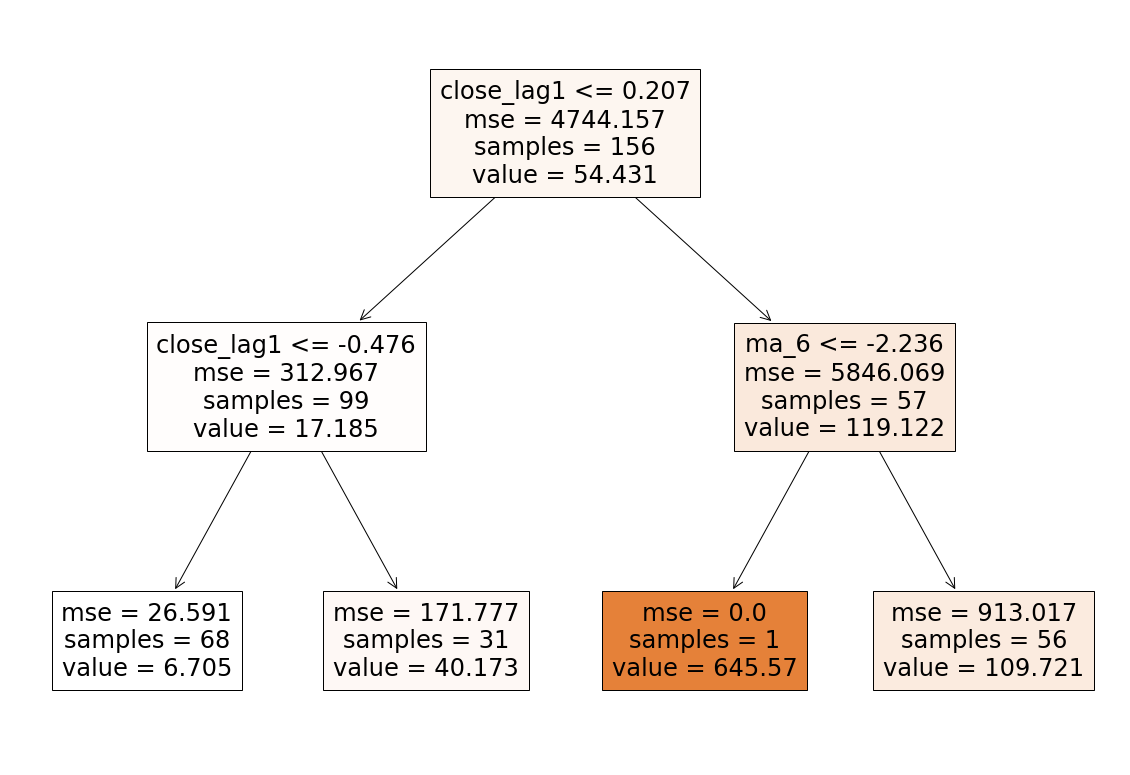

In [9]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 2)

### Training with max depth 3

R Squared on train data:  0.9734446494183121
R Squared on test data:  0.854943803549043


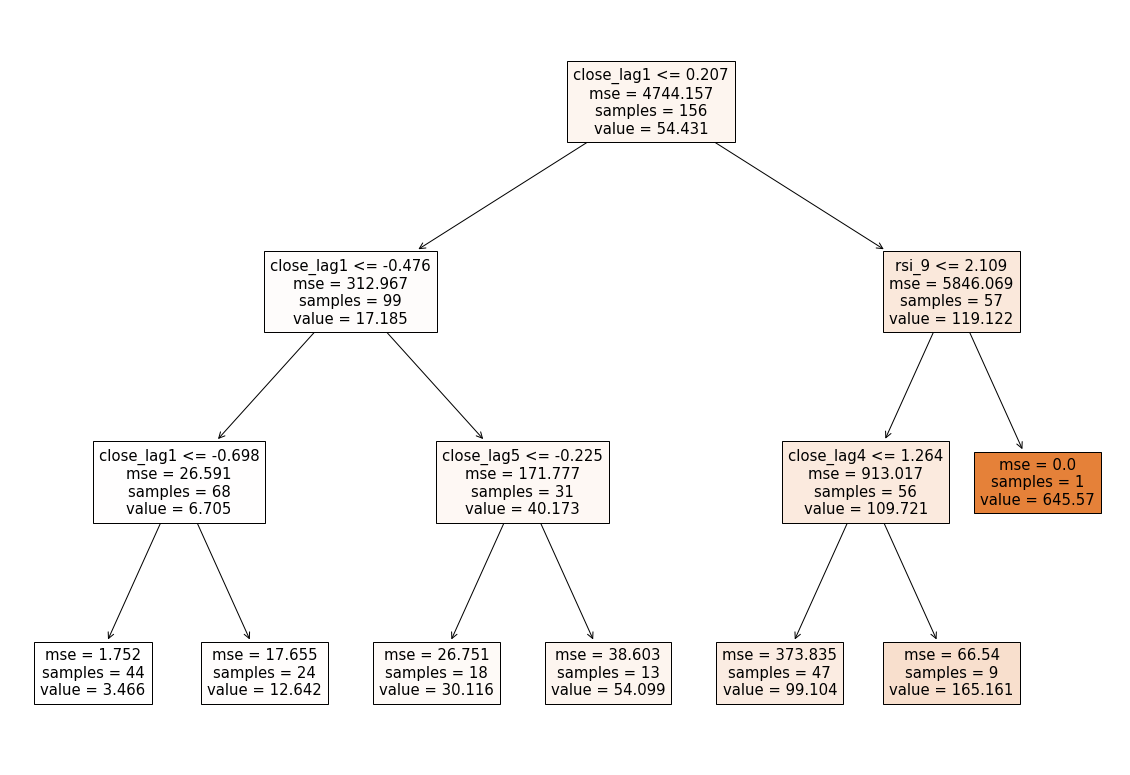

In [10]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 3)

### Training with max depth 4

R Squared on train data:  0.9916878853577327
R Squared on test data:  0.9223059357688016


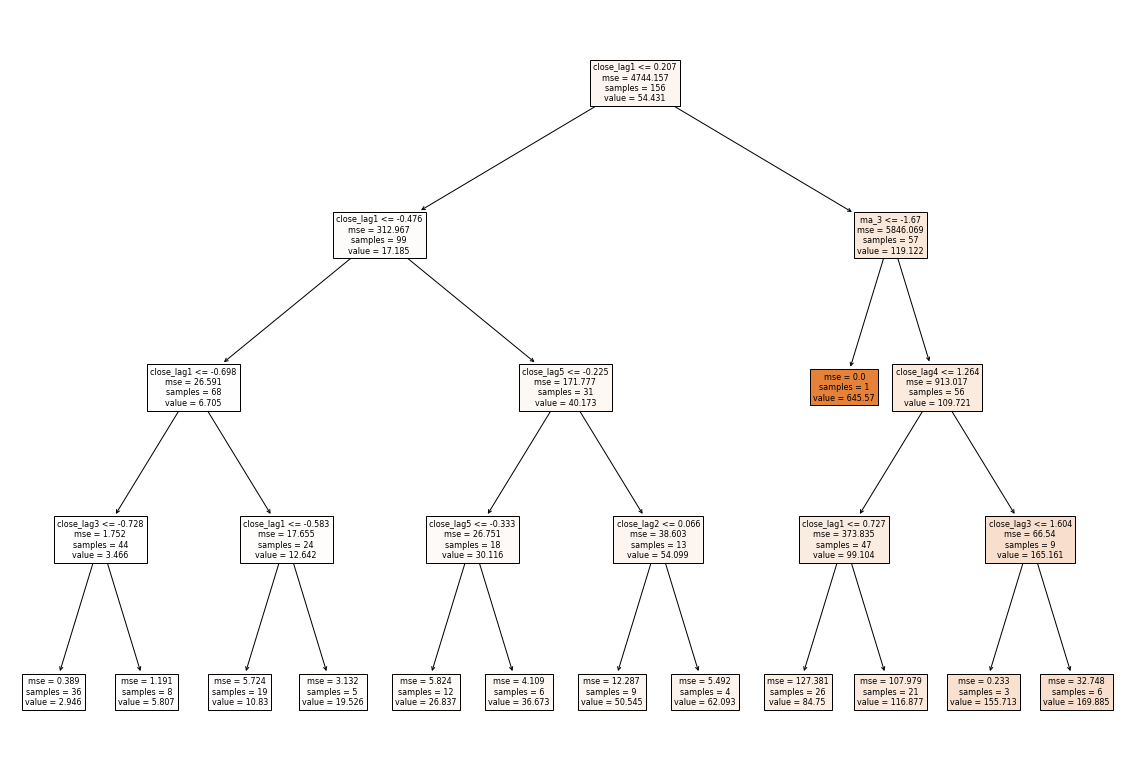

In [11]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 4)